# Titanic classifier

In [1]:
import pandas as pd
import numpy as np
np.random.seed(8)

👇 Import the titanic dataset below

In [2]:
import seaborn as sns
data = sns.load_dataset('titanic').drop(columns=['alive'])
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,True


🔥 Your goal is to use SVM classifiers to test if a passenger survived or not (accuracy score), and compare your performance to your buddy of the day on an unseen test set that you will both share. Be aware that you will only have one trial on the test set!

❓ Write down below in pseudo code the different steps your are going to perform to answer the question.

In [ ]:
# Your answer here
#preprocess(encode,scale)
#split data
#model

<details><summary>Read our answer suggested answer below</summary>
    
    
1. feature encoding
2. train/test split
3. data cleaning
3. feature scaling
4. model tuning: cross-validated randomsearch (coarse grain first, fine grain after)
5. True performance analysis on test set
</details>

## Encoding

❓ Encode your categorical variables

In [3]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(data.survived)
data.survived = encoder.transform(data.survived)
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,True


In [4]:
categorical_features = ['sex', 'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alone']
dummies = pd.get_dummies(data[categorical_features])
dummies

,adult_male,alone,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,class_First,class_Second,class_Third,who_child,who_man,who_woman,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
0,True,False,0,1,0,0,1,0,0,1,0,1,0,0,0,1
1,False,False,1,0,1,0,0,1,0,0,0,0,1,1,0,0
2,False,True,1,0,0,0,1,0,0,1,0,0,1,0,0,1
3,False,False,1,0,0,0,1,1,0,0,0,0,1,0,0,1
4,True,True,0,1,0,0,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,True,True,0,1,0,0,1,0,1,0,0,1,0,0,0,1
887,False,True,1,0,0,0,1,1,0,0,0,0,1,0,0,1
888,False,False,1,0,0,0,1,0,0,1,0,0,1,0,0,1
889,True,True,0,1,1,0,0,1,0,0,0,1,0,1,0,0


In [5]:
data = pd.concat([data, dummies], axis=1).drop(columns=categorical_features)
data

,survived,pclass,age,sibsp,parch,fare,deck,sex_female,sex_male,embarked_C,...,embarked_S,class_First,class_Second,class_Third,who_child,who_man,who_woman,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
0,0,3,22.0,1,0,7.2500,NaN,0,1,0,...,1,0,0,1,0,1,0,0,0,1
1,1,1,38.0,1,0,71.2833,C,1,0,1,...,0,1,0,0,0,0,1,1,0,0
2,1,3,26.0,0,0,7.9250,NaN,1,0,0,...,1,0,0,1,0,0,1,0,0,1
3,1,1,35.0,1,0,53.1000,C,1,0,0,...,1,1,0,0,0,0,1,0,0,1
4,0,3,35.0,0,0,8.0500,NaN,0,1,0,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,NaN,0,1,0,...,1,0,1,0,0,1,0,0,0,1
887,1,1,19.0,0,0,30.0000,B,1,0,0,...,1,1,0,0,0,0,1,0,0,1
888,0,3,NaN,1,2,23.4500,NaN,1,0,0,...,1,0,0,1,0,0,1,0,0,1
889,1,1,26.0,0,0,30.0000,C,0,1,1,...,0,1,0,0,0,1,0,1,0,0


In [6]:
data.drop(columns='deck', inplace=True)
data.dropna(inplace=True)

In [7]:
X = data.drop(columns = 'survived')
y = data['survived']

## Holdout

❓ Holdout 30% of your dataset as test set for final evaluation  
(⚠️ use `random_state=0` to compare final results with your buddy)

In [8]:
from sklearn.model_selection import train_test_split
#one line
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

## Data cleaning

❓ Scale your training set using the scaler of your choice

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

## Baseline Model

❓ Cross-validate a baseline linear SVC model using the accuracy score. 

In [10]:
%%time
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
model = SVC(kernel='linear')
cross_val_score(model, X_train_scaled, y_train, cv=5).mean()

CPU times: user 67.1 ms, sys: 17.4 ms, total: 84.5 ms
Wall time: 93.9 ms


0.8197171717171716

## Random Search

👇 Use a **Random search** to optimize both the parameters `kernel` and `C` of an SVM classifier (SVC), and any other hyperparams of your choice. 
- Start with a total of n_iter=100 combinations, cross-validated 5-time each.
- Use verbose=1 or 2 to check progress
- use n_jobs=-1 to use all your CPU cores

⚠️ If the RandomizedSearchCV seems stuck after more than 10 seconds, make one search per SVM kernel. sklearn sometime experiences issues with grid_searching multiple kernel at a time

In [11]:
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats

In [13]:
model = SVC()

search_space = {
    'kernel':['rbf'],
    'C':stats.uniform(0.01,100),
    'gamma':stats.loguniform(0.001,100)
}

search = RandomizedSearchCV(model,search_space,n_jobs=1,n_iter=100,cv=5,scoring='accuracy',verbose=1)

❓ What are the best parameters and what is the best score?

In [14]:
search.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=100, n_jobs=1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x17de54e80>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x17de54610>,
                                        'kernel': ['rbf']},
                   scoring='accuracy', verbose=1)

In [15]:
search.best_params_

{'C': 41.19455745177358, 'gamma': 0.011243022756237387, 'kernel': 'rbf'}

In [16]:
search.best_score_

0.8236969696969696

In [27]:
model_ = search.best_estimator_
model_.fit(X_train_scaled,y_train)

SVC(C=41.19455745177358, gamma=0.011243022756237387)

In [28]:
print(cross_val_score(model,X_train_scaled,y_train,cv=5).mean())

0.8236969696969696


## Final test score

Select the best model you want to put to test. You will compare your result with your buddy of the day!

Compute its `accuracy`, `classification_report` and the `confusion_matrix` on the test set.

⚠️ You can only test one model. Once you have seen the test set, any other optimization would result in data-leakage 

In [19]:
best_model = SVC(C=41.19455745177358, gamma=0.011243022756237387)
best_model.fit(scaler.transform(X_train), y_train)

SVC(C=41.19455745177358, gamma=0.011243022756237387)

In [20]:
from sklearn.metrics import classification_report

# Use model to predict
y_pred = best_model.predict(scaler.transform(X_test))

# Compare predictions and true values to produce classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.85       125
           1       0.83      0.72      0.77        90

    accuracy                           0.82       215
   macro avg       0.83      0.81      0.81       215
weighted avg       0.82      0.82      0.82       215



/Users/yanyi/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


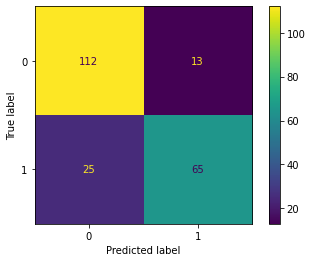

In [30]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(best_model, scaler.transform(X_test), y_test)